# Analyzing Customer Rental Patterns and Preferences

In [1]:
# Import pandas library
import pandas as pd

In [2]:
# Import the dataset from my PC
rental = pd.read_excel(r'C:\Users\Mr. Seedball\Desktop\Portfolio\SQL Projects\Data_driven_rental_decision.xlsx')

In [3]:
# View the first 10 columns of the dataset
rental.head(10)

,customer_id,first_name,last_name,film_title,rental_count,rental_year,rental_month,rental_day
0,1,Mary,Smith,Fireball Philadelphia,2,2005,8,22
1,1,Mary,Smith,Bikini Borrowers,1,2005,8,22
2,1,Mary,Smith,Usual Untouchables,1,2005,7,28
3,1,Mary,Smith,Musketeers Wait,1,2005,6,15
4,1,Mary,Smith,Ferris Mother,1,2005,6,15
5,1,Mary,Smith,Dalmations Sweden,1,2005,8,18
6,1,Mary,Smith,Saturday Lambs,1,2005,7,8
7,1,Mary,Smith,Doors President,1,2005,7,28
8,1,Mary,Smith,Finding Anaconda,1,2005,8,2
9,1,Mary,Smith,Jeepers Wedding,1,2005,7,31


## Data cleaning, quality evaluation steps

In [4]:
# Check for any missing values in the dataset
rental.isnull().sum()

customer_id     0
first_name      0
last_name       0
film_title      0
rental_count    0
rental_year     0
rental_month    0
rental_day      0
dtype: int64

In [5]:
# Check the data types of each column
rental.dtypes

customer_id      int64
first_name      object
last_name       object
film_title      object
rental_count     int64
rental_year      int64
rental_month     int64
rental_day       int64
dtype: object

In [6]:
# Now combine year, month, and day into a single datetime column named 'rental_date' by manually constructing a date string from the year, month, and day columns
rental['rental_date'] = rental['rental_year'].astype(str) + '-' + rental['rental_month'].astype(str).str.zfill(2) + '-' + rental['rental_day'].astype(str).str.zfill(2)

# Convert the constructed date string to a datetime object
rental['rental_date'] = pd.to_datetime(rental['rental_date'])

# Display the first few rows to verify and confirm the creation of the 'rental_date' column before proceeding to next data cleaning steps
rental.head()

,customer_id,first_name,last_name,film_title,rental_count,rental_year,rental_month,rental_day,rental_date
0,1,Mary,Smith,Fireball Philadelphia,2,2005,8,22,2005-08-22
1,1,Mary,Smith,Bikini Borrowers,1,2005,8,22,2005-08-22
2,1,Mary,Smith,Usual Untouchables,1,2005,7,28,2005-07-28
3,1,Mary,Smith,Musketeers Wait,1,2005,6,15,2005-06-15
4,1,Mary,Smith,Ferris Mother,1,2005,6,15,2005-06-15


In [7]:
# Drop the original year, month, and day columns
rental.drop(['rental_year', 'rental_month', 'rental_day'], axis=1, inplace=True)

In [8]:
# Check for duplicate rows
rental.duplicated().sum()

0

In [9]:
# Looking deeper into the dataset descriptive statistics wise
rental.describe

<bound method NDFrame.describe of        customer_id first_name last_name             film_title  rental_count  \
0                1       Mary     Smith  Fireball Philadelphia             2   
1                1       Mary     Smith       Bikini Borrowers             1   
2                1       Mary     Smith     Usual Untouchables             1   
3                1       Mary     Smith        Musketeers Wait             1   
4                1       Mary     Smith          Ferris Mother             1   
...            ...        ...       ...                    ...           ...   
16033          599     Austin   Cintron          Gunfight Moon             1   
16034          599     Austin   Cintron         House Dynamite             1   
16035          599     Austin   Cintron           Family Sweet             1   
16036          599     Austin   Cintron              Zorro Ark             1   
16037          599     Austin   Cintron         Timberland Sky             1   

     

In [10]:
# Generate descriptive statistics for the dataframe 
descriptive_stats = rental.describe(include='all')

In [11]:
# Overview
descriptive_stats

,customer_id,first_name,last_name,film_title,rental_count,rental_date
count,16038.000000,16038,16038,16038,16038.000000,16038
unique,NaN,591,599,958,NaN,NaN
top,NaN,Marion,Hunt,Bucket Brotherhood,NaN,NaN
freq,NaN,68,46,34,NaN,NaN
mean,297.203205,NaN,NaN,NaN,1.000374,2005-07-22 20:11:45.723905664
min,1.000000,NaN,NaN,NaN,1.000000,2005-05-24 00:00:00
25%,148.000000,NaN,NaN,NaN,1.000000,2005-07-07 00:00:00
50%,296.000000,NaN,NaN,NaN,1.000000,2005-07-28 00:00:00
75%,446.000000,NaN,NaN,NaN,1.000000,2005-08-17 00:00:00
max,599.000000,NaN,NaN,NaN,2.000000,2006-02-14 00:00:00


### There is a lot of NaNs in the dataset. However, the dataset is clean since the NaNs are not statistical figures.

In [12]:
# Remove rows with any NaN values (for statistics) in the dataset
rental_cleaned = rental.dropna()

# Display the first few 10 rows of the cleaned dataset to confirm the removal
rental_cleaned.head(10)

,customer_id,first_name,last_name,film_title,rental_count,rental_date
0,1,Mary,Smith,Fireball Philadelphia,2,2005-08-22
1,1,Mary,Smith,Bikini Borrowers,1,2005-08-22
2,1,Mary,Smith,Usual Untouchables,1,2005-07-28
3,1,Mary,Smith,Musketeers Wait,1,2005-06-15
4,1,Mary,Smith,Ferris Mother,1,2005-06-15
5,1,Mary,Smith,Dalmations Sweden,1,2005-08-18
6,1,Mary,Smith,Saturday Lambs,1,2005-07-08
7,1,Mary,Smith,Doors President,1,2005-07-28
8,1,Mary,Smith,Finding Anaconda,1,2005-08-02
9,1,Mary,Smith,Jeepers Wedding,1,2005-07-31


In [13]:
# Generate descriptive statistics for the dataframe 
descriptive_statistics = rental_cleaned.describe(include='all')

In [14]:
# Overview of the descriptive statistics
descriptive_statistics

,customer_id,first_name,last_name,film_title,rental_count,rental_date
count,16038.000000,16038,16038,16038,16038.000000,16038
unique,NaN,591,599,958,NaN,NaN
top,NaN,Marion,Hunt,Bucket Brotherhood,NaN,NaN
freq,NaN,68,46,34,NaN,NaN
mean,297.203205,NaN,NaN,NaN,1.000374,2005-07-22 20:11:45.723905664
min,1.000000,NaN,NaN,NaN,1.000000,2005-05-24 00:00:00
25%,148.000000,NaN,NaN,NaN,1.000000,2005-07-07 00:00:00
50%,296.000000,NaN,NaN,NaN,1.000000,2005-07-28 00:00:00
75%,446.000000,NaN,NaN,NaN,1.000000,2005-08-17 00:00:00
max,599.000000,NaN,NaN,NaN,2.000000,2006-02-14 00:00:00


In [15]:
# Check the total number of NaN values across the dataset
total_nans = rental.isna().sum().sum()

In [16]:
# Overview of the number of NaNs based on statistical figures in the data
total_nans

0

My dataset is now ready for analysis (to naswer the project questions)! The NaNs don't represent missing data in the dataset.

In [17]:
# For this analysis, I need to name the dataframe "rental_data" as a dataframe to continue to avid overwriting
rental_data = rental_cleaned

In [18]:
# Overview
rental_data

,customer_id,first_name,last_name,film_title,rental_count,rental_date
0,1,Mary,Smith,Fireball Philadelphia,2,2005-08-22
1,1,Mary,Smith,Bikini Borrowers,1,2005-08-22
2,1,Mary,Smith,Usual Untouchables,1,2005-07-28
3,1,Mary,Smith,Musketeers Wait,1,2005-06-15
4,1,Mary,Smith,Ferris Mother,1,2005-06-15
...,...,...,...,...,...,...
16033,599,Austin,Cintron,Gunfight Moon,1,2005-07-09
16034,599,Austin,Cintron,House Dynamite,1,2005-07-31
16035,599,Austin,Cintron,Family Sweet,1,2005-06-18
16036,599,Austin,Cintron,Zorro Ark,1,2005-08-21


# Key Questions to Answer with my Dataset

### Question 1: Identify the five most rented movies

In [19]:
# Group by 'film_title' and sum the 'rental_count' to find the most rented movies
most_rented_movies = rental_data.groupby('film_title')['rental_count'].sum().reset_index()

# Afterwards, sort the movies by rental count in descending order to see the most rented movies at the top
most_rented_movies = most_rented_movies.sort_values(by='rental_count', ascending=False)

# Now display the top-five rented movies
most_rented_movies.head()

,film_title,rental_count
96,Bucket Brotherhood,34
705,Rocketeer Mother,33
697,Ridgemont Submarine,32
361,Grit Clockwork,32
465,Juggler Hardly,32


### Question 2: Identify the least five rented movies

In [20]:
# Group by 'film_title' and sum the 'rental_count' to find the least rented movies
least_rented_movies = rental_data.groupby('film_title')['rental_count'].sum().reset_index()

# Sort the movies by rental count in ascending order to see the least rented movies at the top
least_rented_movies = least_rented_movies.sort_values(by='rental_count', ascending=True)

# Display the top entries from the five least rented movies
least_rented_movies.head()

,film_title,rental_count
558,Mixed Doors,4
866,Train Bunch,4
378,Hardly Robbers,4
585,Mussolini Spoilers,5
315,Freedom Cleopatra,5


### Question 3: What are the rental frequencies of the top-five customers

In [21]:
# Group by 'customer_id', 'first_name', and 'last_name' to calculate rental frequency per customer
rental_frequency_per_customer = rental_data.groupby(['customer_id', 'first_name', 'last_name'])['rental_count'].sum().reset_index()

# Sort the results by rental frequency in descending order to see the most active customers
rental_frequency_per_customer = rental_frequency_per_customer.sort_values(by='rental_count', ascending=False)

# Display the five top entries to see the customers with the highest rental frequencies
rental_frequency_per_customer.head()

,customer_id,first_name,last_name,rental_count
147,148,Eleanor,Hunt,46
525,526,Karl,Seal,45
143,144,Clara,Shaw,42
235,236,Marcia,Dean,42
74,75,Tammy,Sanders,41


### Question 4: Analyze the general rental duration trends

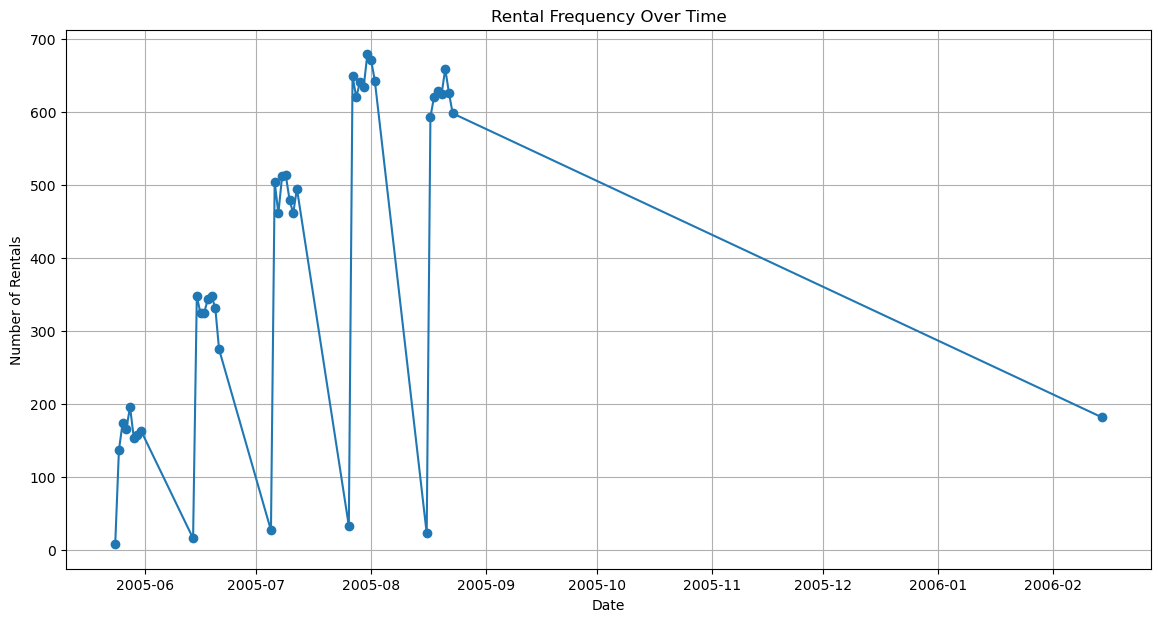

In [22]:
# Count the number of rentals on each unique rental date
rental_date_trends = rental_data.groupby('rental_date')['rental_count'].sum().reset_index()

# Sort by rental date to observe trends over time
rental_date_trends = rental_date_trends.sort_values(by='rental_date')

# Plot the data to visualize trends
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(rental_date_trends['rental_date'], rental_date_trends['rental_count'], marker='o', linestyle='-')
plt.title('Rental Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

In [23]:
# To view the figures of the trend
rental_date_trends

,rental_date,rental_count
0,2005-05-24,8
1,2005-05-25,137
2,2005-05-26,174
3,2005-05-27,166
4,2005-05-28,196
5,2005-05-29,154
6,2005-05-30,158
7,2005-05-31,163
8,2005-06-14,16
9,2005-06-15,348


#### Rentals occurred from Feb. to Aug., with the majority in July and Aug. in 2005, with a sharp decline from Sept. 2005 into Feb. 2006.

# The End...!